In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
tf.__version__

'2.2.0'

In [4]:
keras.__version__

'2.3.0-tf'

In [7]:
# building a n image classifier using sequential API

# stage 1: load dataset 

# using fashion mnist dataset
import tensorflow as tf
from tensorflow import keras
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full,y_train_full),(X_test, y_test)= fashion_mnist.load_data()

# large dataset !!

4423680/4422102 [==============================] - 2s 0us/step


In [8]:
# to check shape and data type of training set

X_train_full.shape

(60000, 28, 28)

In [10]:
X_train_full.dtype

dtype('uint8')

In [11]:
# new step 

# create a validation set ( cross-validation later) ; scale the input features as using GD

X_valid,X_train = X_train_full[:5000] / 255.0 , X_train_full[5000:] / 255.0
y_valid , y_train = y_train_full[:5000] / 255.0 , y_train_full[5000:]

In [14]:
# to know the list of names 

class_names = ["T-shirt/Top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [15]:
# to get image details from set 

class_names[y_train[2]]

# this is from the dataset.

'Sneaker'

In [19]:
# step 3 : creating the model.

# 2 hidden layers and a sequential model.

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]), # convert into 1D array , for preprocessing
    keras.layers.Dense(300,activation = "relu"), # hidden layer with 300 neurons and relu as activation function
    keras.layers.Dense(100,activation = "relu"),
    keras.layers.Dense(10,activation = "softmax") #exclusive classes
])


In [21]:
# to display the layers use the summary method.

model.summary()


# None = batch size can be taken any value.( ideally not more than 32 !)

# 235500 = (784 * 300) + 300 [300 is bias neurons]

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_3 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [22]:
# to fetch layers by name:

model.layers

In [26]:
# complining the model.

# compile() to specify the loss function and which optimizer to be used.

model.compile(loss="sparse_categorical_crossentropy",
             optimizer = "sgd",
             metrics=["accuracy"])

# sparse_categorical_entropy is use because each instance has only target class index , i.e we know from 0-9 

In [27]:
# training the model

history = model.fit(X_train, y_train, epochs = 10,
                   validation_data = (X_valid,y_valid))

# here the va_accuracy is 71% , by increasing the epochs we can get accuracy of ~ 87%
# observe here that the training accuracy and validation accuracy has difference(88% and 71%)


Epoch 1/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.7173 - accuracy: 0.7617 - val_loss: 6.0650 - val_accuracy: 0.0772
Epoch 2/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4884 - accuracy: 0.8292 - val_loss: 6.8195 - val_accuracy: 0.0742.5067 - accuracy: 0.82 - ETA: 1s - l - ETA: 0s - loss: 0
Epoch 3/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4418 - accuracy: 0.8448 - val_loss: 6.6613 - val_accuracy: 0.0842
Epoch 4/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.4145 - accuracy: 0.8551 - val_loss: 7.3535 - val_accuracy: 0.0678
Epoch 5/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3944 - accuracy: 0.8603 - val_loss: 7.5844 - val_accuracy: 0.0764
Epoch 6/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3775 - accuracy: 0.8660 - val_loss: 7.6126 - val_accuracy: 0.0738
Epoch 7/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0

NameError: name 'plt' is not defined

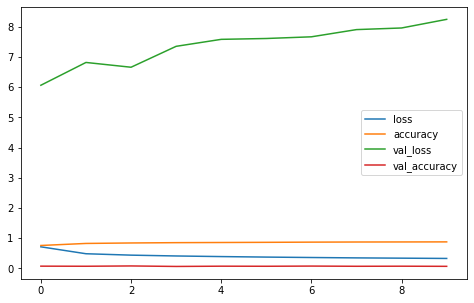

In [28]:
# to visualize it we will create a pandas plot

import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [30]:
# evualuating the model 

# estimate the generalization error 

model.evaluate(X_test,y_test)

# in ideal cases ( when my epoch is more then I should get the result as val_accuracy being more than the test set)
# why ? becuase there is no hyperparameter tuning in test set , use tuning only on validation set.

313/313 [==============================] - 1s 3ms/step - loss: 54.7479 - accuracy: 0.8523


[54.74786376953125, 0.8522999882698059]

In [31]:
# training and evalauation is done.
# now time to predict based on our model.

# use predict() method

X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

# results :

# the class 9 probability is that our model has predicted that it is ankle boot.
# problem with this model is that its not predicting else , i.e it is very sure or its not sure at all!!

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [32]:
# now if we see only highest predictedd probability then 

y_pred = model.predict_classes(X_new)
y_pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([9, 2, 1], dtype=int64)

In [34]:
import numpy as np
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [35]:
y_new = y_test[:3]
y_new

# so with this we can see that classifier classified all images correctly.

array([9, 2, 1], dtype=uint8)